## 배깅, 엑스트라 트리, 에이다부스트

데이터셋 준비

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise = 0.25, random_state = 3) 
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify = ym, random_state =42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)



### 배깅
랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킨다. 
> 샘플을 만드는 것은 랜덤 포레스트와 같음 


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators = 100,
                            oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

#oob_score  = True : 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가한다. 

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [5]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.937
OOB 샘플의 정확도: 0.944


In [6]:
# 결정트리에 배깅 적용 --> 랜덤 포레스트와 비슷하다.

from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, n_jobs = -1, random_state = 42)
bagging.fit(Xm_train, ym_train)



BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47532 missing from cur

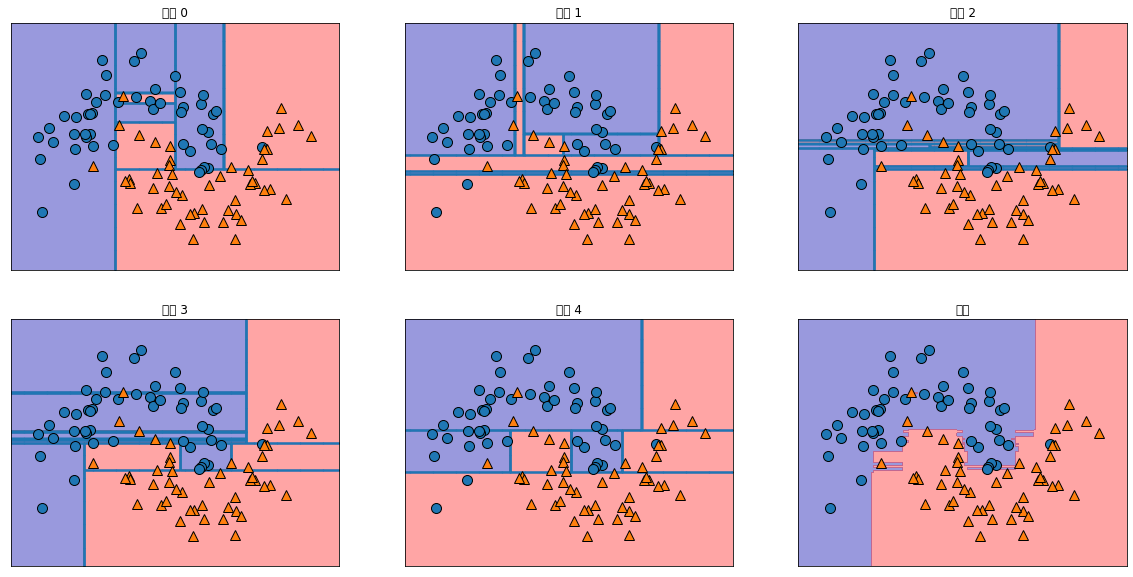

In [11]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np

fig, axes = plt.subplots(2,3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
mglearn.plots.plot_2d_separator(bagging, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()


# 랜덤포레스트와 똑같은 결과를 볼 수 있다. 

In [12]:
# n_estimator = 100으로 늘려서 cnacer 데이터셋에 훈련

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


+ 랜덤 포레스트와 달리 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정 가능
+ 이진분류결정트리는 splitter = 'random'으로 지정 x --> 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음


### 엑스트라 트리

+ 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다.(splitter = 'random')
+ 랜덤 포레스트와 다른 방식으로 모델에 무작위성을 주입한다.
+ 예측 방식 : 트리가 만든 확률값을 평균한다.


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47532 missing from cur

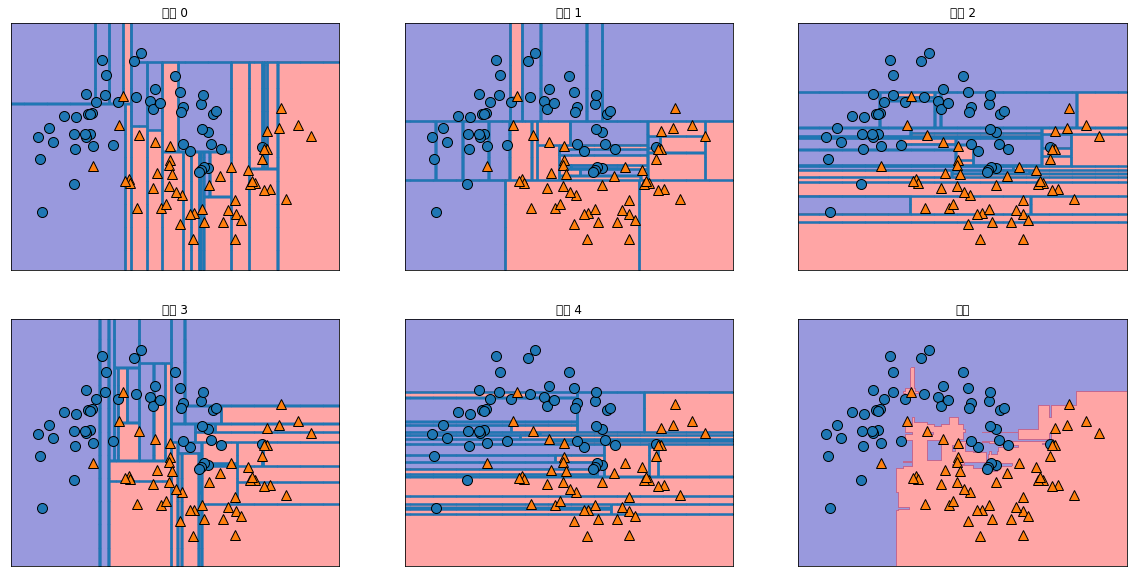

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators = 5, n_jobs = -1, random_state = 0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2,3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
mglearn.plots.plot_2d_separator(xtree, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

+ 개별 트리의 결정 경계가 더 복잡해짐 --> 앙상블한 엑스트라 트리의 결정경계는 안정적임